In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# load data
df = pd.read_csv("data.csv")
df

,Date,Student Loans,Motor Vehicle Loans
0,2006 Q1,480966.98,781942.96
1,2006 Q2,487126.04,774149.38
2,2006 Q3,510548.46,792096.10
3,2006 Q4,521382.49,784975.12
4,2007 Q1,544988.54,780933.91
...,...,...,...
61,2021 Q2,1719067.50,1275248.83
62,2021 Q3,1739443.83,1300418.61
63,2021 Q4,1733415.18,1314107.90
64,2022 Q1,1747455.51,1332846.31


In [10]:
# converts date from str to datetime variable
df['Datex'] = pd.to_datetime(df['Date'].str.replace(' ', '-'))
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 66 non-null     object        
 1   Student Loans        66 non-null     float64       
 2   Motor Vehicle Loans  66 non-null     float64       
 3   Datex                66 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.2+ KB


Timestamp('2022-04-01 00:00:00')

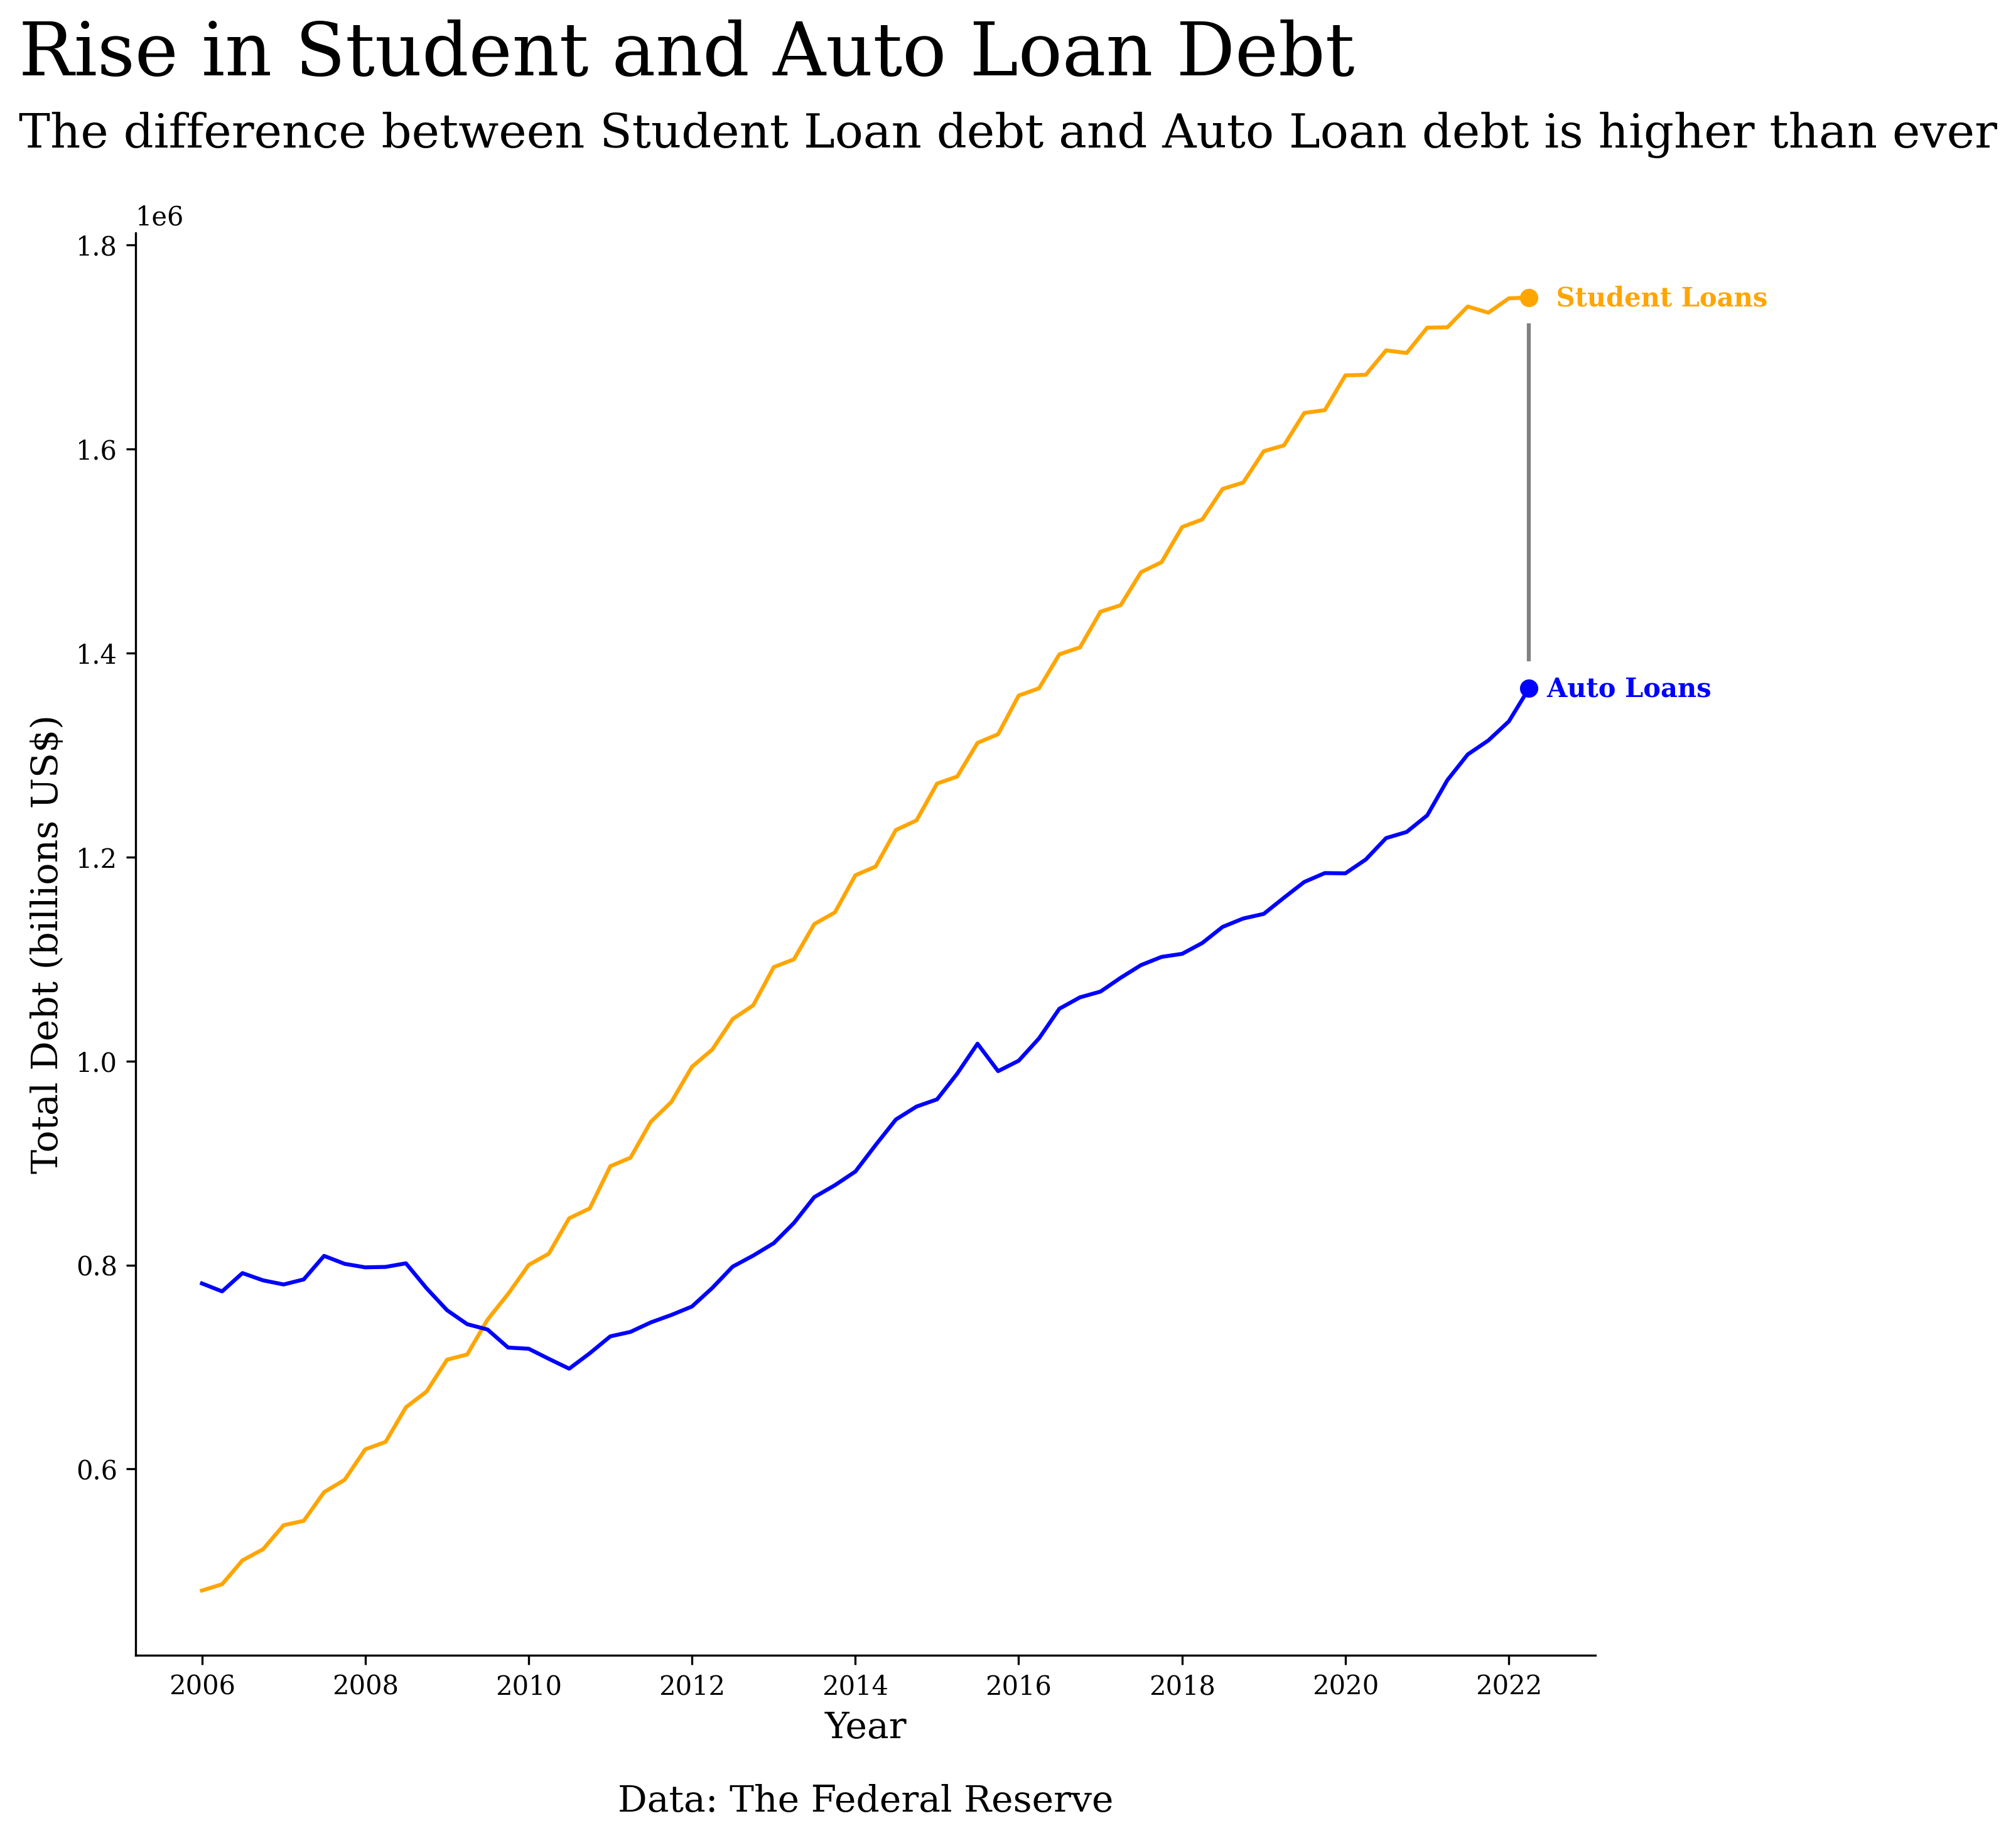

In [29]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white', dpi=300)

plt.rcParams["font.family"] = "serif"

#ax.tick_params(axis='y', left=False)
#plt.yticks([600000,800000,1000000,1200000,1400000,1600000,1800000], fontsize = 14)

plt.ylabel("Total Debt (billions US$)",fontsize = 14)
plt.xlabel("Year", fontsize = 14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.ticklabel_format(axis = 'y', style = 'plain')

ax.plot(df["Datex"], df["Student Loans"], color = "orange")
ax.plot(df["Datex"].iloc[-1], df["Student Loans"].iloc[-1], 'o', c='orange')
ax.annotate("   Student Loans", 
            xy=(df["Datex"].iloc[-1], df["Student Loans"].iloc[-1] - 8000),
            weight = "bold",
            color = "orange")

ax.plot(df["Datex"], df["Motor Vehicle Loans"], color = "blue")
ax.plot(df["Datex"].iloc[-1], df["Motor Vehicle Loans"].iloc[-1], 'o', c='blue')
ax.annotate("  Auto Loans", 
            xy=(df["Datex"].iloc[-1], df["Motor Vehicle Loans"].iloc[-1] - 8000),
            weight = "bold",
            color = "blue")

# add a vertical line showing the diffence
plt.axvline(x = df["Datex"].iloc[-1], 
        #ymin = df["Motor Vehicle Loans"].iloc[-1],
        #ymax = df["Student Loans"].iloc[-1],
        ymin = 0.7,
        ymax = 0.935,
        color = 'grey', 
        label = 'axvline - full height')


plt.title('Rise in Student and Auto Loan Debt', 
             fontsize=28, 
             loc='left', 
             x=-0.08, y=1.1)


ax.text(s='The difference between Student Loan debt and Auto Loan debt is higher than ever', 
        x=-.08, y=1.06, 
        fontsize=18, 
        transform=ax.transAxes)

ax.text(s='Data: The Federal Reserve', 
        x=0.5, y=-0.11,
        horizontalalignment='center',
        fontsize=14, 
        transform=ax.transAxes)



plt.show()